# ================================================
# TITANIC SURVIVAL PREDICTION PROJECT
# ================================================

# 1. Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

# 2. Load Dataset

In [3]:
data = sns.load_dataset('titanic')
data.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [126]:
data.shape

(891, 15)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [128]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 3. Data Cleaning & Preprocessing

In [130]:
data.drop(['embark_town','class','who','adult_male','deck','alive'], axis=1, inplace=True)

In [131]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [132]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [133]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


# 4. (EDA)

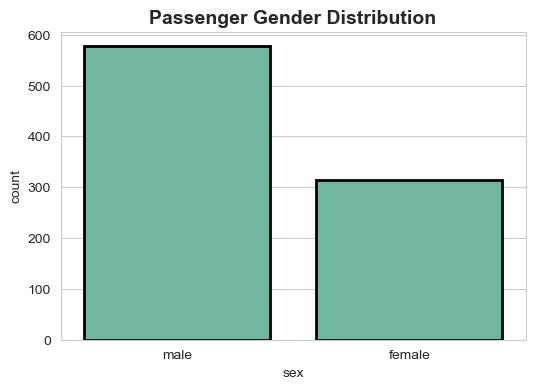

In [135]:
# ---- Gender Distribution ----
plt.figure(figsize=(6,4)) 
sns.set_style("whitegrid") 
sns.set_palette("Set2")    
sns.countplot(x='sex', data=data, edgecolor="black", linewidth=2)
plt.title("Passenger Gender Distribution", fontsize=14, fontweight='bold')
plt.show()

In [136]:
# Convert 'sex' to numeric (male=1, female=0)
data['sex'] = data['sex'].map({'male':1,'female':0})

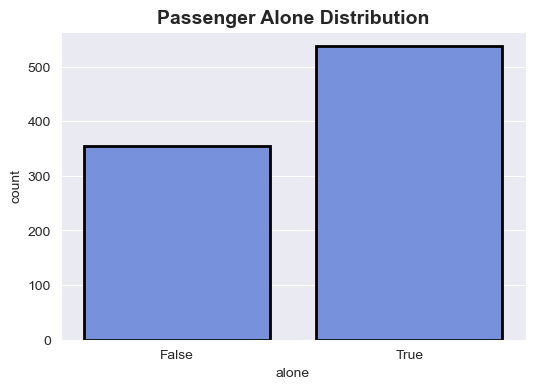

In [137]:
# ---- Alone Distribution ----
plt.figure(figsize=(6,4)) 
sns.set_style("darkgrid") 
sns.set_palette("coolwarm")    
sns.countplot(x='alone', data=data, edgecolor="black", linewidth=2)
plt.title("Passenger Alone Distribution", fontsize=14, fontweight='bold')
plt.show()

In [138]:
# Convert 'alone' to integer
data['alone'] = data['alone'].astype(int)

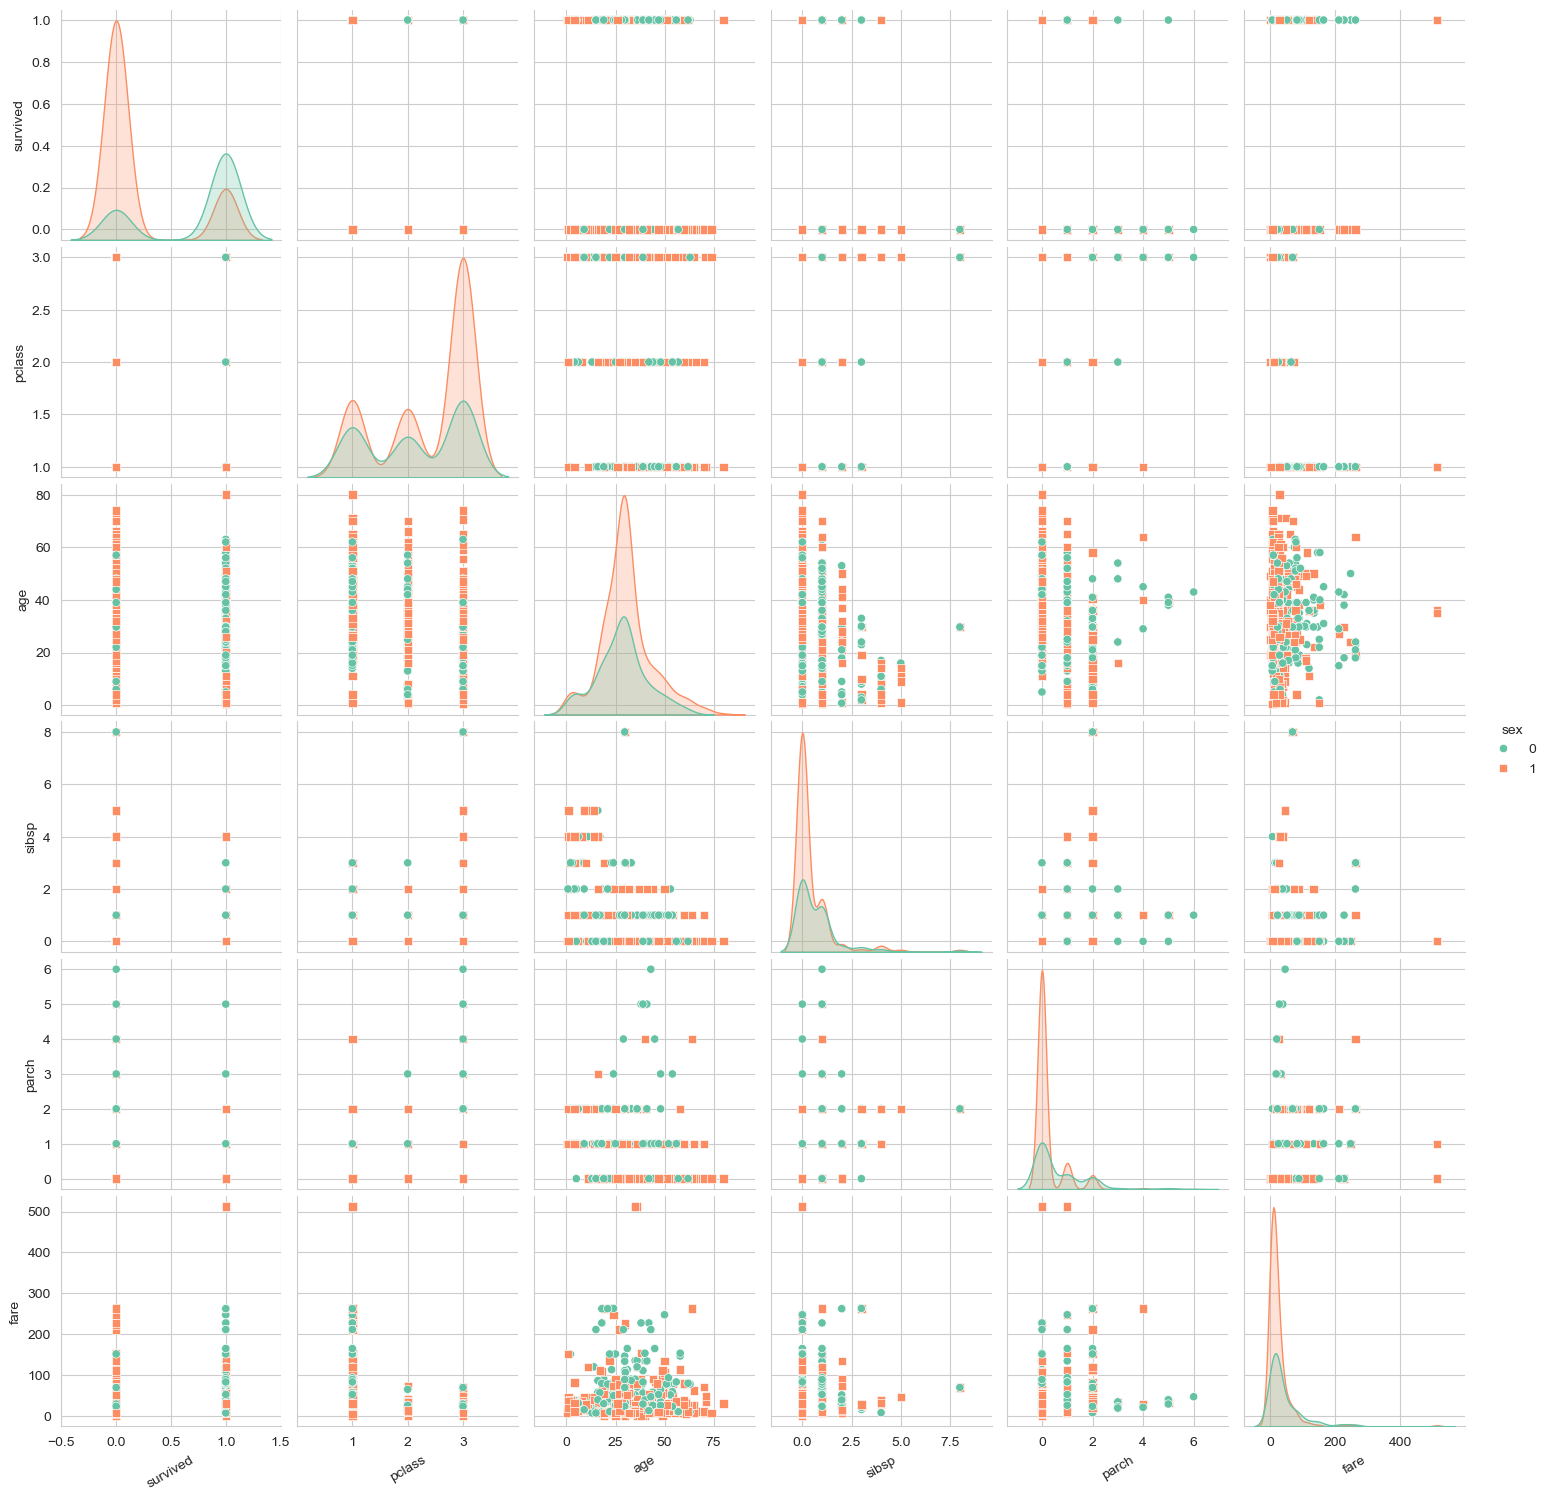

In [139]:

# ---- Pairplot ----
sns.set_style("whitegrid")  
sns.set_palette("Set2")

plot = sns.pairplot(
    data.drop('alone', axis=1), 
    hue="sex", 
    diag_kind="kde",     # KDE for smooth diagonal plots
    markers=["o", "s"],  # Different markers for categories
    height=2.5
)

# Rotate axis labels for readability
for ax in plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=30)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

plt.show()

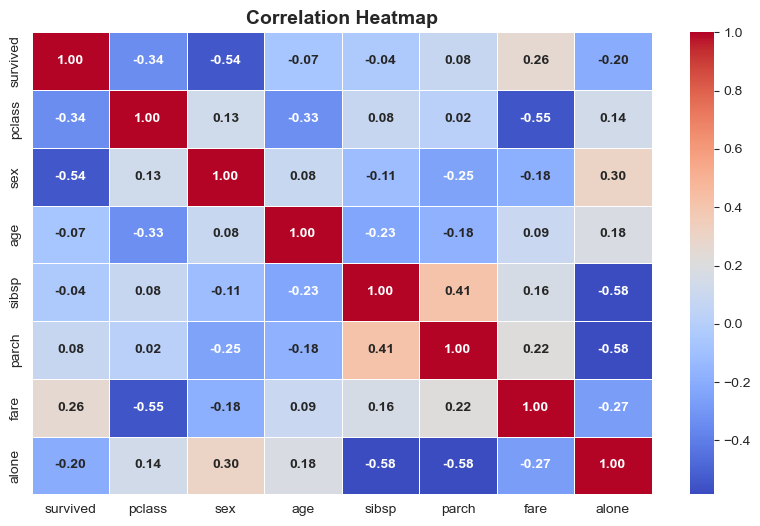

In [140]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(10,6)) 
sns.heatmap(
    data.corr(numeric_only=True), 
    annot=True, 
    fmt=".2f",          
    cmap="coolwarm",    
    cbar=True,         
    linewidths=0.5,     
    annot_kws={"size":10, "weight":"bold"} 
)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

# 5. Feature Encoding & Scaling

In [141]:
df = data.copy()
print(df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


In [142]:
# Encode categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['embarked'] = le.fit_transform(df['embarked'])

In [143]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('survived', axis=1)
y = df['survived']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 6. Model Training & Evaluation

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_predict = model.predict(X_test)

# Accuracy & Report
Accuracy = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict)

print("Accuracy : ", Accuracy)
print("Report : ", report)

Accuracy :  0.8156424581005587
Report :                precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



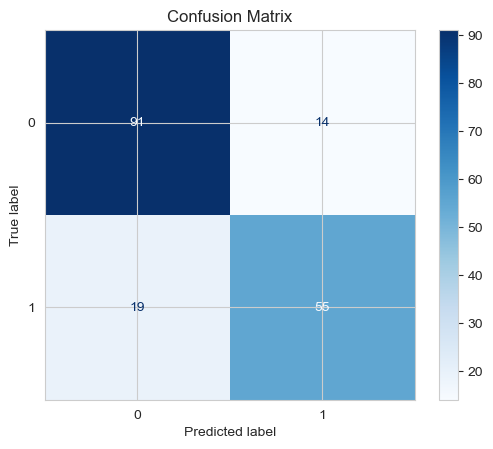

In [145]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 7. Custom Prediction Function

In [146]:
def predict_passenger_simple(model, scaler, values):
    """
    Predict survival of a passenger given input values.
    Parameters:
        model: Trained ML model
        scaler: Fitted StandardScaler
        values: List of passenger features
    Returns:
        1 -> Survived
        0 -> Did not survive
    """
    x = np.array(values).reshape(1, -1)   
    
    # Apply scaling
    if scaler is not None:
        x = scaler.transform(x)
    
    return model.predict(x)[0]


# Example passenger prediction
sample_passenger = [3, 1, 22, 1, 0, 7.25, 0, 1]
prediction = predict_passenger_simple(model, scaler, sample_passenger)

print("✅ Survived" if prediction == 1 else "❌ Did not survive")

❌ Did not survive


In [5]:
dff = sns.load_dataset('titanic')

In [6]:
dff.to_csv("mydata.csv", index=False)